Problem 3a.
- Consider the Poison distribution:
\begin{equation*}
p(y;\lambda) = \frac{e^{-\lambda}\lambda^y}{y!} = \frac{1}{y!}\exp(-\lambda+\log\lambda^y) = \frac{1}{y!}\exp(y\log\lambda-\lambda)
\end{equation*}
- Therefore, we come up with the result:
\begin{align*}
\eta &= \log\lambda \\ 
T(y) &= y \\
b(y) &= \frac{1}{y!} \\
a(\eta) &= \lambda = e^{\eta}
\end{align*}

Problem 3b. Calonical repsone function:
\begin{equation*}
E[T(y)|\eta] = E[y|\eta] = \lambda = e^{\eta}
\end{equation*}

Problem 3c.
- We have:
    + $E[y|x;\theta] = E[y|\eta] = b(y)\exp(\eta^TT(y)-a(\eta))$
    + $\eta = \theta^Tx$

- Therefore:
\begin{align*}
\ell(\theta) = \log p(y^{(i)}|x^{(i)},\theta) &= \log(b(y)) +  \eta^TT(y)-a(\eta)
\end{align*}

- Calculate the partial of $\ell$ with $\theta$:

\begin{align*}
\frac{\partial}{\partial \theta} \ell(\theta) &= T(y^{(i)})\frac{\partial}{\partial \theta}\theta^Tx^{(i)} - e^{\theta^Tx^{(i)}}\frac{\partial}{\partial \theta}\theta^Tx^{(i)} \\
&= \left(T(y^{(i)})-e^{\theta^Tx^{(i)}}\right)x^{(i)} \\
&= \left(y^{(i)}-e^{\theta^Tx^{(i)}}\right)x^{(i)} 
\end{align*}
- Therefore, the gradient ascent of this is:
\begin{align*}
\theta := \theta + \alpha \left(y^{(i)}-e^{\theta^Tx^{(i)}}\right)x^{(i)} 
\end{align*}

In [3]:
import numpy as np
from util import *
import matplotlib.pyplot as plt
from linear_model import LinearModel

In [5]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        
        self.theta = np.zeros(n)

        for _ in range(self.max_iter):
            theta_old = np.copy(self.theta)
            self.theta += self.step_size * x.T @ (y - np.exp(x@theta_old))
            if np.linalg.norm(self.theta-theta_old, ord=1) < self.eps:
                break

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return np.exp(x@self.theta)
        # *** END CODE HERE ***

Theta = [7.3663442  3.93318364 3.43316055 2.00016609 4.40044556]
Accuracy =  1912.955730380572


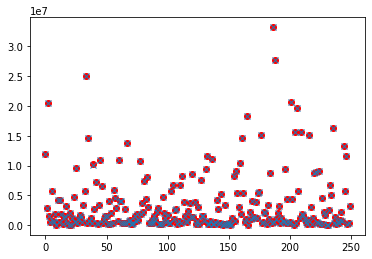

In [6]:
train_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds4_train.csv"
valid_path = "/Users/tranlehai/Desktop/cs229/solution_problem_sets/PS01/data/ds4_valid.csv"

x_valid, y_valid = load_dataset(valid_path, add_intercept=True)
x_train, y_train = load_dataset(train_path, add_intercept=True)
pois = PoissonRegression(step_size=4e-11, max_iter = 10000)
pois.fit(x_train, y_train)

plt.plot(pois.predict(x_valid), "ro")
plt.plot(y_valid, "x")
print("Theta =",pois.theta)
print("Accuracy = ", np.mean(np.sqrt(np.mean((pois.predict(x_train) - y_train)**2))))

In [7]:
np.sqrt(np.mean((pois.predict(x_valid) - y_valid)**2))

1965.9864026431082